# Grupo 20: Thiago e Gabriele

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import preprocessing

In [2]:
#carregando dataset
df = pd.read_csv('trabalho7_dados_20.csv')
df.head()

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao,classe
0,11553,428.696991,170.706741,87.529068,0.858541,11845,0.601061,1
1,11212,413.566010,169.678101,84.634750,0.866719,11400,0.808888,1
2,12519,455.406006,192.002182,83.872147,0.899544,12770,0.670685,0
3,13387,458.955994,180.400818,95.742058,0.847548,13653,0.632955,1
4,11462,424.557007,175.419998,84.140518,0.877459,11650,0.798245,1


## Algumas informações sobre o dataset

- area: quantidade de pixels dentro da região do grão;
- perimetro: perímetro do contorno do grão;
- maior-eixo: tamanho do maior eixo que forma o grão;
- menor-eixo: tamanho do menor eixo do grão;
- arredondamento: arredondamento da elipse que forma o grão;
- area-convexa: quantidade de pixels no menor envoltório convexo que cobre o grão;
- extensao: razão entre a região formada pelo grão e a caixa de corte da imagem do grão; e
- classe: 0 ou 1 (representando o tipo de arroz)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            1143 non-null   int64  
 1   perimetro       1143 non-null   float64
 2   maior-eixo      1143 non-null   float64
 3   menor-eixo      1143 non-null   float64
 4   arredondamento  1143 non-null   float64
 5   area-convexa    1143 non-null   int64  
 6   extensao        1143 non-null   float64
 7   classe          1143 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 71.6 KB


In [5]:
df.describe()

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao,classe
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,12657.737533,454.219458,188.700638,86.290548,0.886794,12943.037620,0.661346,0.572178
std,1708.954405,35.466620,17.352014,5.795007,0.021109,1757.601844,0.077857,0.494979
min,7943.000000,359.100006,147.798889,63.344753,0.811163,8080.000000,0.498075,0.000000
25%,11413.000000,426.356995,174.594543,82.722767,0.871799,11637.000000,0.598172,0.000000
50%,12466.000000,449.713989,185.857895,86.328339,0.888987,12770.000000,0.645903,1.000000
75%,13962.000000,484.053497,203.030571,90.306107,0.902607,14296.000000,0.724118,1.000000
max,17948.000000,548.445984,233.913513,107.542450,0.948007,18322.000000,0.832747,1.000000


Pontos observados:
* Todas as variáveis são numéricas e possuem a mesma quantidade de valores;
* O valor de desvio padrão para algumas variáveis é muito grande;


## Pré-processamento

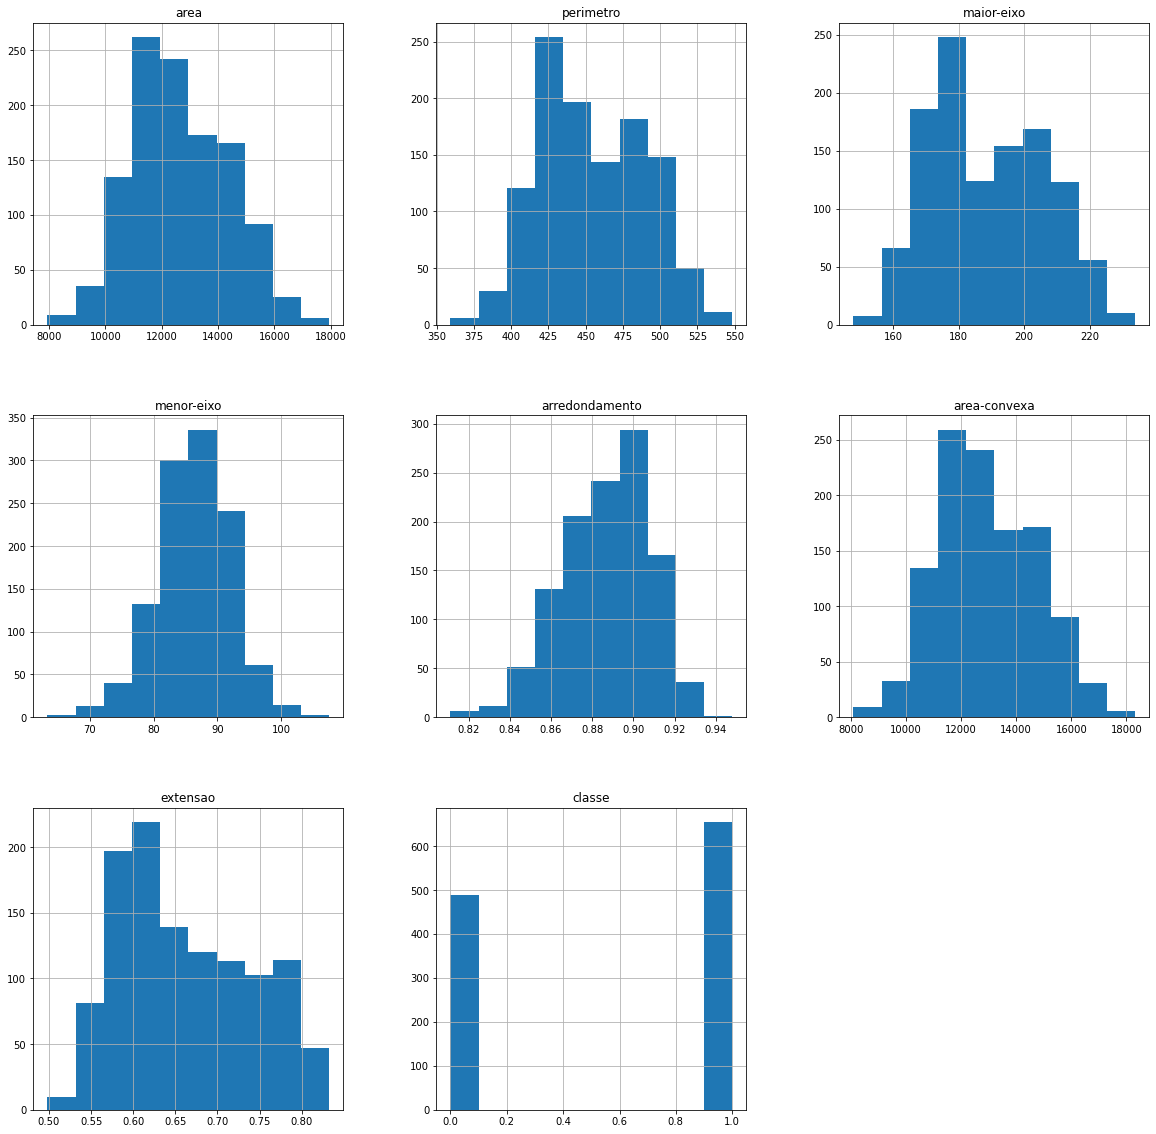

In [6]:
p = df.hist(figsize = (20,20))

### Observando o balanceamento

1    654
0    489
Name: classe, dtype: int64


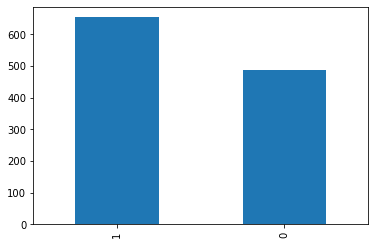

In [7]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["classe"].map(lambda x: color_wheel.get(x + 1))
print(df.classe.value_counts())
p=df.classe.value_counts().plot(kind="bar")

A classe 1 representa cerca de 60% dos dados, enquanto a classe 0 representa 40% dos dados.

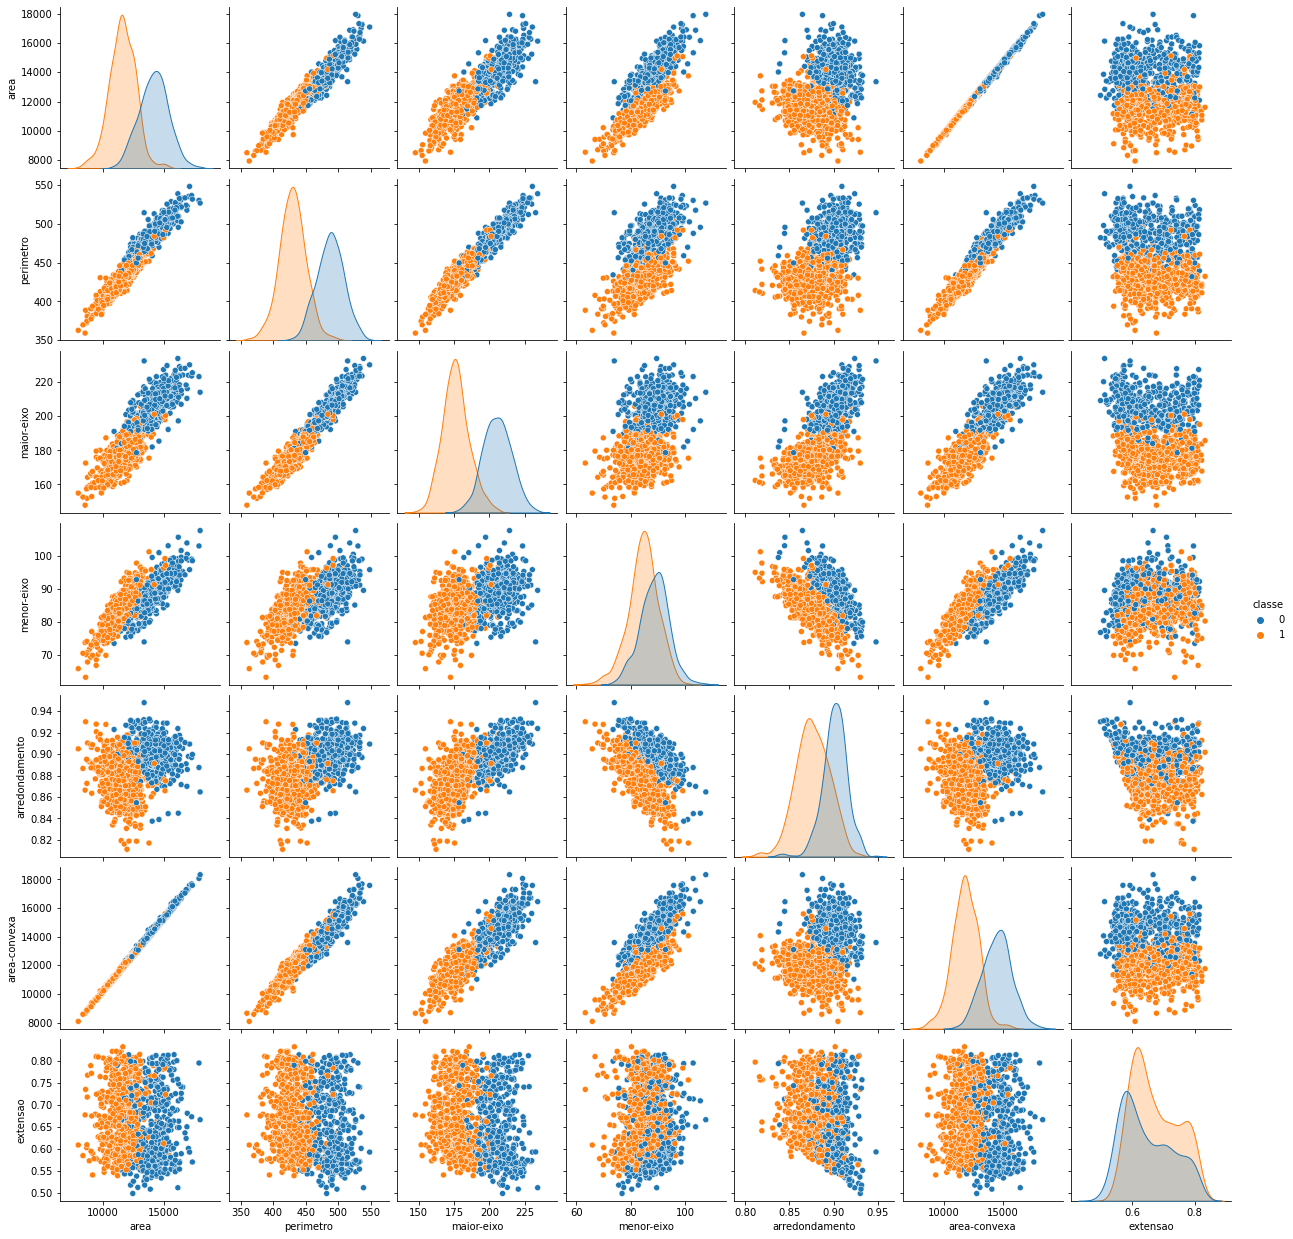

In [8]:
p=sns.pairplot(df, hue = 'classe')

### Correlação

<AxesSubplot:>

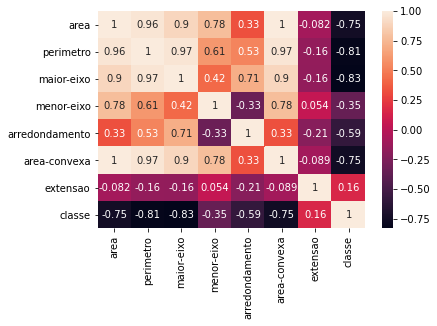

In [9]:
correlacao = df.corr()
sns.heatmap(correlacao, annot=True)

### Normalização

In [10]:
scaler = preprocessing.MinMaxScaler( feature_range=(0, 1) )
df_norm = pd.DataFrame( scaler.fit_transform(df), columns=df.columns )
df_norm

,area,perimetro,maior-eixo,menor-eixo,arredondamento,area-convexa,extensao,classe
0,0.360820,0.367565,0.266016,0.547185,0.346220,0.367604,0.307722,1.0
1,0.326737,0.287653,0.254071,0.481699,0.405986,0.324155,0.928709,1.0
2,0.457371,0.508624,0.513308,0.464445,0.645857,0.457918,0.515757,0.0
3,0.544128,0.527373,0.378588,0.733009,0.265890,0.544132,0.403021,1.0
4,0.351724,0.345701,0.320748,0.470517,0.484466,0.348565,0.896907,1.0
...,...,...,...,...,...,...,...,...
1138,0.344028,0.409341,0.374745,0.436865,0.564660,0.361062,0.781913,1.0
1139,0.209595,0.188084,0.117121,0.416975,0.323413,0.210018,0.383329,1.0
1140,0.628086,0.693989,0.681562,0.573491,0.671535,0.629662,0.564892,0.0
1141,0.334633,0.388421,0.339244,0.434919,0.536275,0.342316,0.461896,1.0


### Observando os outliers

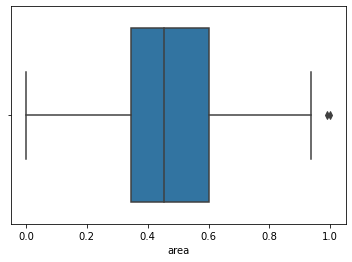

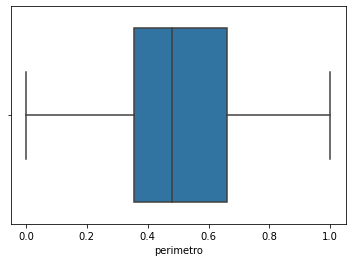

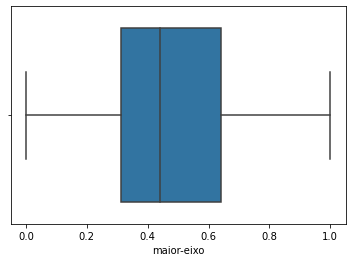

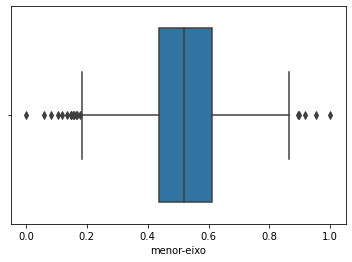

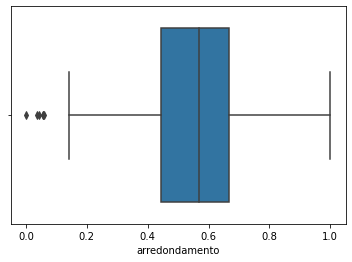

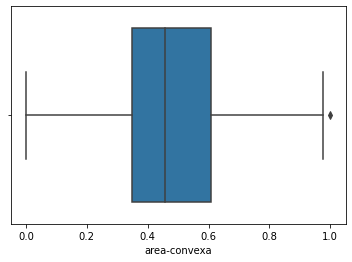

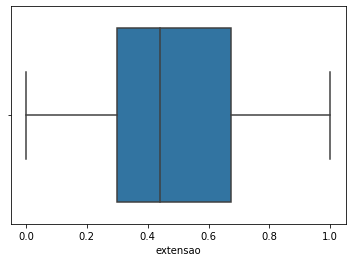

In [11]:
import seaborn as sns
for key in df.keys()[:-1]:
    sns.boxplot(x=df_norm[key])
    plt.show()

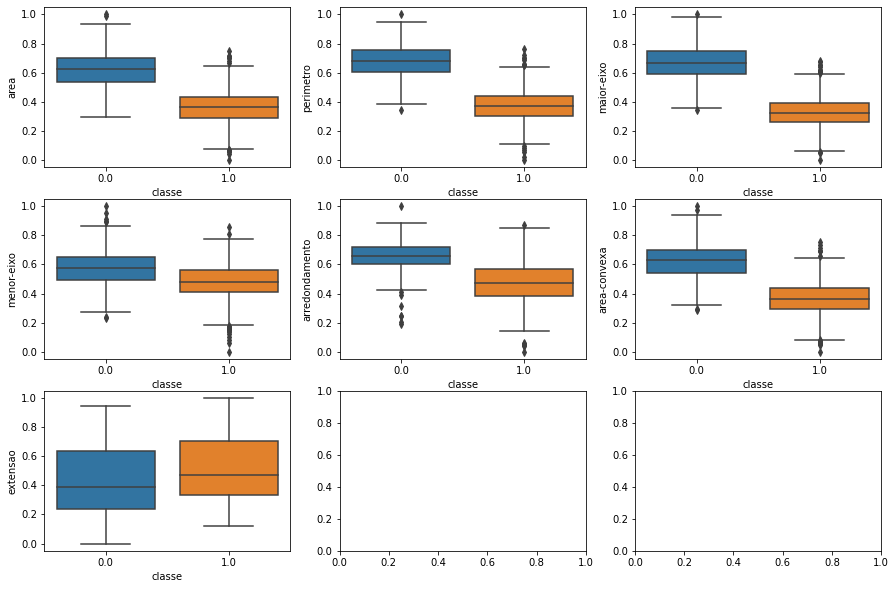

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(df_norm.keys()[:-1], ax.flatten()):
    sns.boxplot(x='classe', y=var, data=df_norm, ax=subplot)
    

### Separando os dados 

In [13]:
from sklearn.model_selection import train_test_split
X = df_norm.drop(columns='classe')
y = df_norm['classe']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,random_state= 20200301)

#### Criando csv com as classificações dos modelos

In [14]:
ytest_csv = pd.DataFrame(index=ytest.index,columns=['RegLogic', 'KNN'])
# ytest_csv['y_original'] = ytest

## Modelos de Classificação

#### Métricas de verificação dos métodos utlizados

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

origem: https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

### KNN e Regressão Logística

Modelo: KNN

Grid Search
Best Score:0.9412500000000001
Best Parameters: {'n_neighbors': 26}


Matriz de confusão com os totais
Predicted  0.0  1.0  All
True                    
0.0        148    9  157
1.0         22  164  186
All        170  173  343

Acurácia: 0.9096209912536443
Precisão:[0.87058824 0.94797688]
Precisão média:0.9092825569534172

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91       157
         1.0       0.95      0.88      0.91       186

    accuracy                           0.91       343
   macro avg       0.91      0.91      0.91       343
weighted avg       0.91      0.91      0.91       343




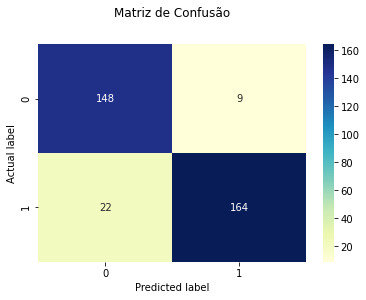

__________________________________________________________
Modelo: Regressao Logistica

Grid Search
Best Score:0.9475
Best Parameters: {'C': 100.0, 'penalty': 'l2'}


Matriz de confusão com os totais
Predicted  0.0  1.0  All
True                    
0.0        146   11  157
1.0         23  163  186
All        169  174  343

Acurácia: 0.9008746355685131
Precisão:[0.86390533 0.93678161]
Precisão média:0.9003434673195947

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       157
         1.0       0.94      0.88      0.91       186

    accuracy                           0.90       343
   macro avg       0.90      0.90      0.90       343
weighted avg       0.90      0.90      0.90       343




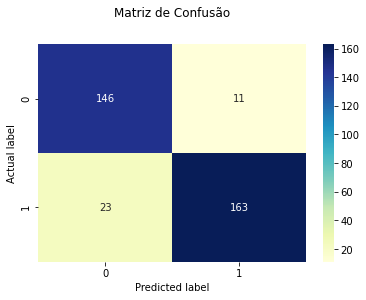

__________________________________________________________


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

mod_knn = KNeighborsClassifier( n_neighbors=26, weights="distance" )
mod_reg = LogisticRegression(C=100.0)
modelos=[mod_knn, mod_reg]
# ---------------------------
cont=0
for modelo in modelos:
    modelo.fit(xtrain, ytrain)

    ypred = modelo.predict(xtest)
    if cont==0:
        print('Modelo: KNN')
        ytest_csv['KNN'] = ypred
        #In case of classifier like knn the parameter to be tuned is n_neighbors
        param_grid = {'n_neighbors':np.arange(1,50)}
        knn_cv= GridSearchCV(modelo,param_grid,cv=5)
        knn_cv.fit(xtrain,ytrain)
        print('\nGrid Search')
        print("Best Score:" + str(knn_cv.best_score_))
        print("Best Parameters: " + str(knn_cv.best_params_))
        print("\n")
    else:
        print('Modelo: Regressao Logistica')
        ytest_csv['RegLogic'] = ypred
        
        grid={"C":np.logspace(-3,3,7), "penalty":['l2']}
        rl_cv= GridSearchCV(modelo,param_grid=grid,cv=5)
        rl_cv.fit(xtrain,ytrain)
        print('\nGrid Search')
        print("Best Score:" + str(rl_cv.best_score_))
        print("Best Parameters: " + str(rl_cv.best_params_))
        print('\n')
        
        
    confusion_matrix(ytest,ypred)
    print('Matriz de confusão com os totais')
    print(pd.crosstab(ytest, ypred, rownames=['True'], colnames=['Predicted'], margins=True))  
    acuracia = accuracy_score(ytest, ypred)
    print('\nAcurácia: '+str(acuracia))
    precisao = precision_score(ytest, ypred,  average=None)
    print('Precisão:'+str(precisao))
    print('Precisão média:'+str(np.mean(precisao)))
    print("")
    
    print(classification_report(ytest,ypred))
    print("")
  
    cnf_matrix = confusion_matrix(ytest, ypred)
    p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Matriz de Confusão', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    print('__________________________________________________________')
    cont+=1


De acordo com as matrizes de confusão e as análises estatísticas, tivemos mais acertos utilizando o moedlo KNN.\
Pontos que podem ter influenciado no resultado do modelo de Regerssão Logística:
- O modelo assume uma distribuição discreta dos dados e o dataset possui vairáveis com distribuição contínua;
- A regressão logística requer multicolinearidade média ou nenhuma entre as variáveis independentes;

Com o objetivo de verificar a qualidade dos modelos, comparando os dois modelos, iremos aplicar um outro método de verificação.

### Curva ROC

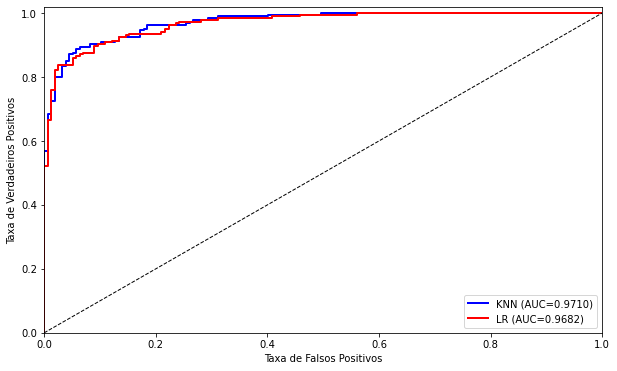

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba1 = modelos[0].predict_proba(xtest)[:,1]
y_pred_proba2 = modelos[1].predict_proba(xtest)[:,1]

fprKnn, tprKnn,  thresholds1 = roc_curve(ytest, y_pred_proba1)
fprLR, tprLR, thresholds2 = roc_curve(ytest, y_pred_proba2)

aucKnn = roc_auc_score( ytest,y_pred_proba1)
aucLR = roc_auc_score( ytest, y_pred_proba2 )


plt.figure(figsize=(10,6))
plt.plot(fprKnn, tprKnn, color="blue", lw=2, label="KNN (AUC=%0.4f)"%aucKnn)
plt.plot(fprLR, tprLR, color="red", lw=2, label="LR (AUC=%0.4f)"%aucLR)

plt.plot([0,1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()

Podemos concluir que o KNN é o melhor modelo para este conjunto de dados.

In [58]:
# ytest_csv.to_csv('trabalho7_dados_teste.csv')